In [1]:
# import sys
# !{sys.executable} -m pip install backtrader

    100% |████████████████████████████████| 419kB 1.2MB/s ta 0:00:01
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from load_candles import sample_cerebro
import backtrader as bt
import backtrader.feeds as btfeed
import matplotlib

2021-01-17 00:43:38
{'volume': 43.536, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 38), 'high': 36270.45, 'low': 36222.49, 'close': 36258.49, 'open': 36270.45}
2021-01-17 00:43:37
{'volume': 43.518, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 37), 'high': 36270.45, 'low': 36222.49, 'close': 36258.49, 'open': 36270.45}
2021-01-17 00:43:36
{'volume': 43.511, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 36), 'high': 36270.45, 'low': 36222.49, 'close': 36259.77, 'open': 36270.45}
2021-01-17 00:43:35
{'volume': 43.21, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 35), 'high': 36270.45, 'low': 36222.49, 'close': 36264.33, 'open': 36270.45}
2021-01-17 00:43:33
{'volume': 40.116, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 33), 'high': 36270.45, 'low': 36222.49, 'close': 36265.48, 'open': 36270.45}
2021-01-17 00:43:32
{'volume': 39.952, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 32), 'high': 36270.45, 'low': 36222.49, 'close': 36265.48, 'open': 36270.45}
2021-

In [2]:
class SmaCross(bt.SignalStrategy):
    params = (('pfast', 1), ('pslow', 3),)
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=self.p.pfast), bt.ind.SMA(period=self.p.pslow)
        self.signal_add(bt.SIGNAL_LONG, bt.ind.CrossOver(sma1, sma2))

2021-01-17 00:43:38
24
{'volume': 43.536, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 38), 'high': 36270.45, 'low': 36222.49, 'close': 36258.49, 'open': 36270.45, 'id': 24}
2021-01-17 00:43:37
23
{'volume': 43.518, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 37), 'high': 36270.45, 'low': 36222.49, 'close': 36258.49, 'open': 36270.45, 'id': 23}
2021-01-17 00:43:36
22
{'volume': 43.511, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 36), 'high': 36270.45, 'low': 36222.49, 'close': 36259.77, 'open': 36270.45, 'id': 22}
2021-01-17 00:43:35
21
{'volume': 43.21, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 35), 'high': 36270.45, 'low': 36222.49, 'close': 36264.33, 'open': 36270.45, 'id': 21}
2021-01-17 00:43:33
20
{'volume': 40.116, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 33), 'high': 36270.45, 'low': 36222.49, 'close': 36265.48, 'open': 36270.45, 'id': 20}
2021-01-17 00:43:32
19
{'volume': 39.952, 'datetime': datetime.datetime(2021, 1, 17, 0, 43, 32), 'high': 3

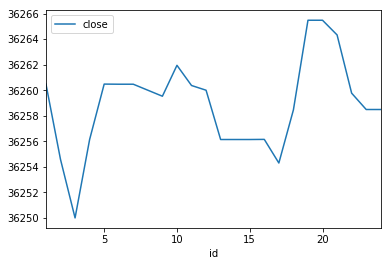

In [2]:
import pandas as pd
from load_candles import sample_df
data = sample_df()#cerebro()

#data['unix'] = pd.to_datetime([data['id']]).astype(int) / 10**9

import matplotlib.pyplot as plt
data.plot(x='id', y='close')
plt.show()

#cerebro = bt.Cerebro()
#cerebro.adddata(data)
#cerebro.addstrategy(SmaCross, pfast=5, pslow=30)
#cerebro.run()
#cerebro.plot()